In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')
from utils import *
import pickle
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
candidates_mapping = {
    0 : "Arthaud",
    1 : "Asselineau",
    2 : "Cheminade",
    3 : "Dupont-Aignan",
    4 : "Fillon",
    5 : "Hamon",
    6 : "Lassalle",
    7 : "Le Pen",
    8 : "Macron",
    9 : "Mélenchon",
    10 : "Poutou"
}

In [3]:
f = open("../communities/v1/partition", "rb")
partition = pickle.load(f)
f.close()

In [4]:
f = open("../communities/v1/nb_tweets_per_user", "rb")
nb_tweets_per_user = pickle.load(f)
f.close()
f = open("../communities/v1/graph", "rb")
G = pickle.load(f)
f.close()

In [5]:
f = open("../communities/v1/candidates_to_community", "rb")
candidates_to_community = pickle.load(f)
f.close()

In [81]:
# sort communities in descending order with respect to the number of users they contain
sorted_communities = [(v[0][1], len(v)) for k,v in candidates_to_community.items()]
sorted_communities.sort(key=lambda x: x[1],reverse=True)
sorted_communities

[(0, 722), (6, 587), (8, 562), (2, 495), (21, 196)]

In [86]:
candidates_to_users = dict()
users = candidates_to_community[9][:,0]
nb_retweets_per_user = get_ratio_retweets_per_user(users)
nb_retweets_per_user = np.array([(user, ratio) for user, ratio in nb_retweets_per_user.items()])
to_keep = nb_retweets_per_user[np.where(nb_retweets_per_user[:,1] < 1)][:,0]
candidates_to_users[9] = to_keep
print("{} - number of bots among {} users : {}".format("Mélenchon", len(users),\
                                                       len(users) - len(to_keep)))

Le Pen - number of bots among 722 users : 12


In [76]:
candidates_to_users = dict()

for cand, community in candidates_to_community.items():
    users = community[:,0]
    nb_retweets_per_user = get_ratio_retweets_per_user(users)
    nb_retweets_per_user = np.array([(user, ratio) for user, ratio in nb_retweets_per_user.items()])
    to_keep = nb_retweets_per_user[np.where(nb_retweets_per_user[:,1] < 1)][:,0]
    candidates_to_users[cand] = to_keep
    print("{} - number of bots among {} users : {}".format(candidates_mapping[cand], len(users),\
                                                           len(users) - len(to_keep)))

Macron - number of bots among 587 users : 10
Mélenchon - number of bots among 722 users : 12
Fillon - number of bots among 495 users : 4
Hamon - number of bots among 196 users : 5
Le Pen - number of bots among 562 users : 3


## Analysis of Mélenchon's community

In [137]:
partition_M, G_M, nb_tweets_M = filter_graph_users(partition, G, nb_tweets_per_user, candidates_to_users[9])

In [136]:
dict_centrality = nx.degree_centrality(G_M)
dict_centrality_filtered = {k:v for k,v in dict_centrality.items() if v > 0.005}
users_to_keep = list(dict_centrality_filtered.keys())

In [138]:
users_color = get_nodes_color(users_to_keep)

In [139]:
partition_M, G_M, nb_tweets_M = filter_graph_users(partition_M, G_M, nb_tweets_M, users_to_keep)

In [140]:
for node in G_M.nodes():
    print(node, users_color.get(node))

701858222840401921 red
717067651953082372 red
701171611689418752 red
715524301567496193 red
149624843 red
834855615340150787 red
504619030 red
714231071475429380 green
846416323706077189 red
3295121440 red
783542232594911232 red
28666886 blue
113315885 red
2775197747 red
1364480052 red
818847510546546690 blue
793956420 blue
39805001 red
729153620 red
1392312410 red
471031900 blue
1369694305 red
559560809 red
3023497329 red
2519431870 red
244170872 green
777776607973019648 red
835192228859547648 red
461957277 red
714181175439462400 red
3390775469 red
2659793089 blue
811026099278843906 red
809465812738158592 red
362696910 red
813093777925689344 red
223418611 red
53029114 red
390199573 red
707780635687985153 blue
546720037 blue
4450427177 red
113127133 red
734327088 blue
30202175 blue
560265542 red
488552777 green
302178643 red
2392416606 red
805440217008263168 red
430717305 blue
113084801 blue
774530039568359424 red
834837665732243456 red
116101512 red
19243413 red
1585922466 red
1251393

/Users/lauranguyen/Documents/UPMC/M1/S2/PLDAC/PLDAC_TWITTER/community_graph.py:29: RuntimeWarning: divide by zero encountered in log
  _node_size = np.log(np.array([dict_node_size.get(node) for node in G.nodes()]))


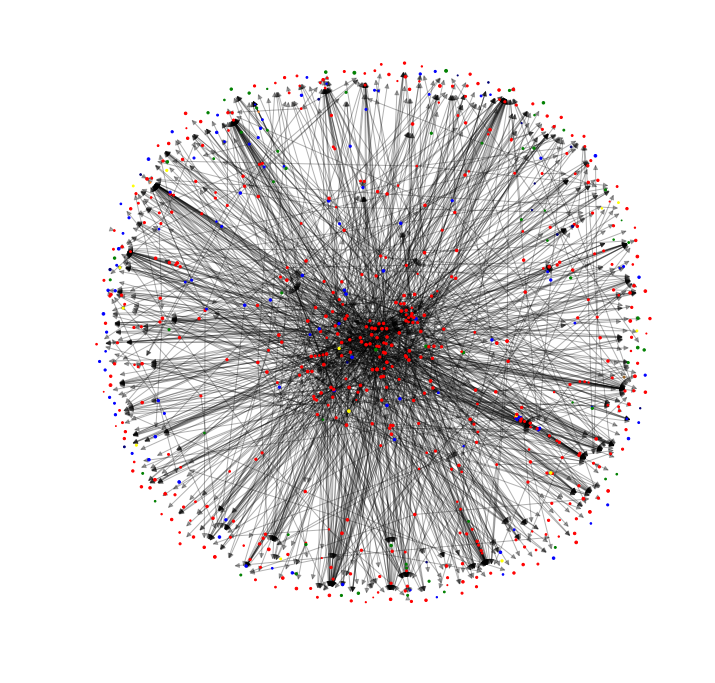

In [33]:
plot_community_graph(G_M, pos_M, partition_M, nb_tweets_M, dict_node_color=users_color)

In [31]:
count_colors = Counter(list(cand_colors.values()))
count_colors

Counter({'#000075': 15,
         '#9A6324': 1,
         '#f58231': 3,
         'blue': 115,
         'green': 70,
         'red': 502,
         'yellow': 16})

In [53]:
dict_centrality = nx.degree_centrality(G_0)
nodes_centrality_sorted = sorted(dict_centrality.items(), key=lambda kv: kv[1], reverse=True)

# central nodes and their degree centrality
for i in range(10):
    print(nodes_centrality_sorted[i])

(145058470, 0.07616361071932298)
(834855615340150787, 0.07334273624823695)
(818847510546546690, 0.06488011283497884)
(264404407, 0.06488011283497884)
(3023497329, 0.06205923836389281)
(808398248696287232, 0.06205923836389281)
(717406522930806784, 0.060648801128349784)
(329686497, 0.060648801128349784)
(2437430341, 0.05923836389280677)
(805349615222620160, 0.05500705218617771)


In [63]:
nodes_centrality_sorted = np.array(nodes_centrality_sorted)
# set threshold to eliminate users that do not sufficiently belong to the community
nodes_centrality_filtered = nodes_centrality_sorted[nodes_centrality_sorted[:,1] > 0.005]

In [66]:
partition_0_f = dict()
G_0_f = G_0.copy()
nb_tweets_0_f = dict()
for user_id, comm_id in partition_0.items():
    if user_id in nodes_centrality_filtered[:,0]:
        partition_0_f [user_id] = comm_id
        nb_tweets_0_f[user_id] = nb_tweets_0[user_id]
    else:
        G_0_f.remove_node(user_id)

In [58]:
pos_0_f = community_layout(G_0_f, partition_0_f)

/Users/lauranguyen/Documents/UPMC/M1/S2/PLDAC/PLDAC_TWITTER/community_graph.py:42: RuntimeWarning: divide by zero encountered in log
  _node_size = np.log(np.array([dict_node_size.get(node) for node in G.nodes()]))


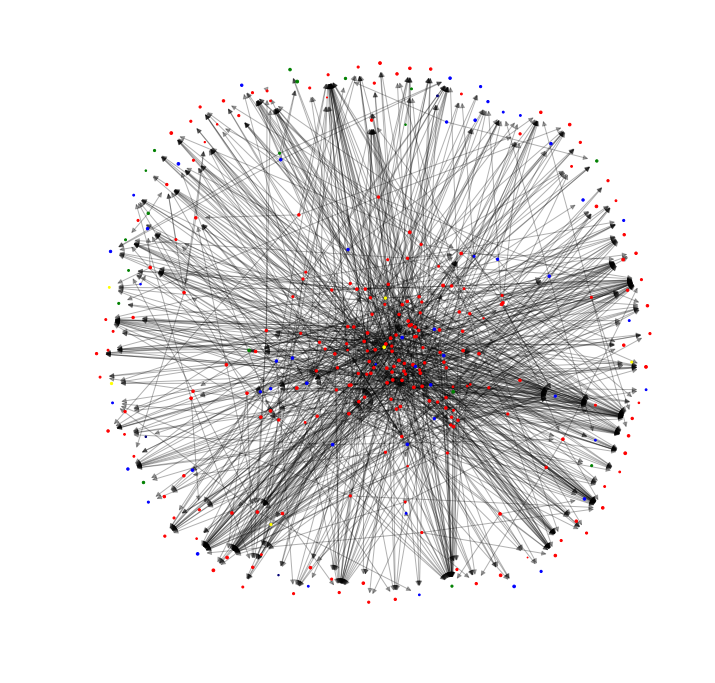

In [99]:
plot_community_graph(G_0_f, pos_0_f, partition_0_f, nb_tweets_0_f, dict_node_color=cand_colors)

In [67]:
users_0_f = nodes_centrality_filtered[:,0]

In [78]:
list(users_0_f)

[145058470.0,
 8.348556153401508e+17,
 8.188475105465467e+17,
 264404407.0,
 3023497329.0,
 8.083982486962872e+17,
 7.174065229308068e+17,
 329686497.0,
 2437430341.0,
 8.053496152226202e+17,
 19822406.0,
 504619030.0,
 53029114.0,
 83416937.0,
 3554576537.0,
 7.094327693493412e+17,
 7.929829144221491e+17,
 223418611.0,
 2519431870.0,
 113127133.0,
 8.203260818488197e+17,
 580904021.0,
 340435921.0,
 4897361049.0,
 8.042619088827884e+17,
 7.618935719852851e+17,
 4450427177.0,
 560265542.0,
 2569688191.0,
 312748941.0,
 125139363.0,
 127659284.0,
 3145739224.0,
 2899949519.0,
 7.155243015674962e+17,
 4919925406.0,
 2775197747.0,
 2815916728.0,
 1068938792.0,
 8.417302908506399e+17,
 734327088.0,
 7.07908811470803e+17,
 242492168.0,
 1546814226.0,
 2852068474.0,
 48465669.0,
 7.04789771164459e+17,
 1392312410.0,
 19243413.0,
 364577705.0,
 45139249.0,
 536002005.0,
 618927738.0,
 8.517817785536143e+17,
 7.971411328535142e+17,
 7.018582228404019e+17,
 39805001.0,
 362696910.0,
 8.04341093

In [72]:
tweets_0 = []

for user in users_0_f:
    tweets_0 = np.append(tweets_0, get_tweets_from_user(user, N=10))